In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

%matplotlib inline

## Read prediction results

In [2]:
test_res = pd.read_csv("results.tsv", sep = '\t')

In [3]:
test_res.shape

(16786, 115)

In [4]:
test_res.head()

,chemical_id,chemical_name,disease_id,disease_name,category,origin,status,prior_logit,prior_prob,degree_CbG,...,dwpc_CrCtDtCtD,dwpc_CrCuGiGaD,dwpc_CuGaDuGaD,dwpc_CuGbCtDrD,dwpc_CuGcGiGaD,dwpc_CuGdDpSpD,dwpc_CuGuCbGaD,dwpc_CuGuCtDrD,dwpc_CuGuCuGaD,predicted_value
0,DB00014,NaN,DOID:10283,NaN,NaN,holdout,0,-3.666000,0.02494,-1.3940,...,-0.3369,-0.7161,-0.640,-0.3452,-0.4416,-0.6257,1.0280,-0.1836,0.7228,0.016262
1,DB00091,NaN,DOID:10283,NaN,NaN,holdout,0,-2.491000,0.07648,1.5180,...,-0.3369,-0.7161,3.520,-0.3452,3.9420,3.0890,3.7440,1.2790,4.0940,0.063105
2,DB00136,NaN,DOID:10283,NaN,NaN,holdout,0,-2.934000,0.05051,-0.6787,...,3.2910,1.2510,3.203,-0.3452,2.6100,1.5590,2.9280,0.9959,3.1090,0.025176
3,DB00158,NaN,DOID:10283,NaN,NaN,holdout,0,-inf,0.00000,0.5132,...,3.3480,1.4510,-0.640,-0.3452,-0.5826,-0.6257,-0.7218,-0.6438,-0.6780,0.021757
4,DB00177,NaN,DOID:10283,NaN,NaN,holdout,0,-2.934000,0.05051,-0.4395,...,-0.3369,0.3342,-0.640,-0.3452,1.3420,0.0155,1.4420,-0.5245,1.5420,0.019126


## Read holdout set

In [5]:
with open("../../crossval_idx.txt", "r") as fin:
    holdout_idx = int(fin.readline().strip())

In [6]:
holdout_idx

0

In [7]:
holdout = pd.read_csv("../../../crossval/data/holdout/holdout_piece{}.tsv".format(holdout_idx), sep = '\t')

In [8]:
holdout.shape

(16786, 6)

In [9]:
holdout.head()

,chemical_id,disease_id,disease_name,chemical_name,category,piece
0,DB00014,DOID:0050156,NaN,NaN,NaN,NaN
1,DB00014,DOID:0050425,NaN,NaN,NaN,NaN
2,DB00014,DOID:0050741,NaN,NaN,NaN,NaN
3,DB00014,DOID:1024,NaN,NaN,NaN,NaN
4,DB00014,DOID:10283,NaN,NaN,NaN,NaN


In [10]:
holdout["category"].value_counts()

DM     163
SYM     79
NOT     49
Name: category, dtype: int64

---

In [11]:
def df_to_pairs(df, chem = "chemical_id", dise = "disease_id"):
    return set(zip(df[chem], df[dise]))

In [12]:
holdout_p = df_to_pairs(holdout)

test_res_p = df_to_pairs(test_res, chem = "chemical_id", dise = "disease_id")

In [13]:
holdout_p >= test_res_p

True

In [14]:
missing_p = holdout_p - test_res_p

In [15]:
len(missing_p)

0

In [16]:
missing = (pd
    .DataFrame(list(missing_p), columns = ["chemical_id", "disease_id"])
    .merge(holdout, how = "left", on = ["chemical_id", "disease_id"])
)

In [17]:
missing.shape

(0, 6)

In [18]:
missing["category"].value_counts()

Series([], Name: category, dtype: int64)

Some relations missing from the predicted results, but only contains one disease modifying treatment, so it's no big deal.

---

In [19]:
info = holdout[["chemical_id", "disease_id", "category"]]

In [20]:
test_res = (test_res
    .drop(["chemical_name", "disease_name", "category", "status"], axis = 1)
    .merge(info, how = "left", on = ["chemical_id", "disease_id"])
)    

In [21]:
test_res.head()

,chemical_id,disease_id,origin,prior_logit,prior_prob,degree_CbG,degree_CcSE,degree_CdG,degree_CiPC,degree_CrC,...,dwpc_CrCuGiGaD,dwpc_CuGaDuGaD,dwpc_CuGbCtDrD,dwpc_CuGcGiGaD,dwpc_CuGdDpSpD,dwpc_CuGuCbGaD,dwpc_CuGuCtDrD,dwpc_CuGuCuGaD,predicted_value,category
0,DB00014,DOID:10283,holdout,-3.666000,0.02494,-1.3940,0.6723,-0.97110,0.2821,0.4233,...,-0.7161,-0.640,-0.3452,-0.4416,-0.6257,1.0280,-0.1836,0.7228,0.016262,NaN
1,DB00091,DOID:10283,holdout,-2.491000,0.07648,1.5180,0.8699,2.28700,1.2350,-1.5830,...,-0.7161,3.520,-0.3452,3.9420,3.0890,3.7440,1.2790,4.0940,0.063105,NaN
2,DB00136,DOID:10283,holdout,-2.934000,0.05051,-0.6787,0.1501,0.93630,0.2821,0.4233,...,1.2510,3.203,-0.3452,2.6100,1.5590,2.9280,0.9959,3.1090,0.025176,NaN
3,DB00158,DOID:10283,holdout,-inf,0.00000,0.5132,-0.6014,-0.97110,-1.2120,0.3077,...,1.4510,-0.640,-0.3452,-0.5826,-0.6257,-0.7218,-0.6438,-0.6780,0.021757,NaN
4,DB00177,DOID:10283,holdout,-2.934000,0.05051,-0.4395,0.1728,-0.01779,0.2821,0.3077,...,0.3342,-0.640,-0.3452,1.3420,0.0155,1.4420,-0.5245,1.5420,0.019126,NaN


In [22]:
test_res.shape

(16786, 112)

/home/tongli/anaconda3/envs/integrate/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


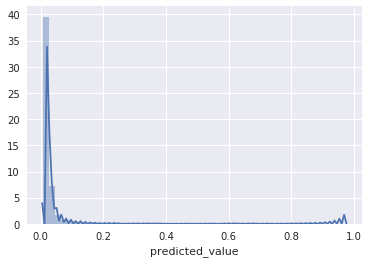

In [23]:
sns.distplot(test_res["predicted_value"])

In [24]:
test_res = test_res.sort_values("predicted_value", ascending = False)

In [25]:
test_res.head()

,chemical_id,disease_id,origin,prior_logit,prior_prob,degree_CbG,degree_CcSE,degree_CdG,degree_CiPC,degree_CrC,...,dwpc_CrCuGiGaD,dwpc_CuGaDuGaD,dwpc_CuGbCtDrD,dwpc_CuGcGiGaD,dwpc_CuGdDpSpD,dwpc_CuGuCbGaD,dwpc_CuGuCtDrD,dwpc_CuGuCuGaD,predicted_value,category
2709,DB00884,DOID:11476,holdout,-3.825,0.021360,-1.3940,0.41320,-0.9711,0.2821,0.3077,...,0.57980,-0.6400,-0.3452,-0.58260,-0.6257,-0.7218,-0.6438,-0.67800,0.972429,DM
13147,DB00630,DOID:5408,holdout,-4.845,0.007803,-0.4395,0.07669,0.3352,0.2821,0.4233,...,-0.57710,0.2171,2.2980,-0.18080,-0.3926,-0.6175,0.4045,-0.13560,0.946436,DM
14936,DB01014,DOID:8577,holdout,-3.913,0.019600,-0.6787,-3.12500,1.1010,0.2821,0.3077,...,-0.48530,0.5635,-0.3452,-0.33800,0.8360,0.4797,-0.5279,0.09699,0.904074,DM
2683,DB00630,DOID:11476,holdout,-3.825,0.021360,-0.4395,0.07669,0.3352,0.2821,0.4233,...,-0.09874,1.5560,-0.3452,0.02615,0.4802,0.9160,-0.1673,0.24980,0.878989,NaN
5291,DB00563,DOID:1324,holdout,-0.542,0.367700,1.5540,0.82370,1.7910,0.2821,0.3077,...,-0.54460,2.2690,3.5220,2.55200,2.7580,2.6700,2.1650,2.58500,0.873887,NaN


In [26]:
test_res["true_label"] = (test_res["category"] == "DM").astype(int)

In [27]:
test_res.head()

,chemical_id,disease_id,origin,prior_logit,prior_prob,degree_CbG,degree_CcSE,degree_CdG,degree_CiPC,degree_CrC,...,dwpc_CuGaDuGaD,dwpc_CuGbCtDrD,dwpc_CuGcGiGaD,dwpc_CuGdDpSpD,dwpc_CuGuCbGaD,dwpc_CuGuCtDrD,dwpc_CuGuCuGaD,predicted_value,category,true_label
2709,DB00884,DOID:11476,holdout,-3.825,0.021360,-1.3940,0.41320,-0.9711,0.2821,0.3077,...,-0.6400,-0.3452,-0.58260,-0.6257,-0.7218,-0.6438,-0.67800,0.972429,DM,1
13147,DB00630,DOID:5408,holdout,-4.845,0.007803,-0.4395,0.07669,0.3352,0.2821,0.4233,...,0.2171,2.2980,-0.18080,-0.3926,-0.6175,0.4045,-0.13560,0.946436,DM,1
14936,DB01014,DOID:8577,holdout,-3.913,0.019600,-0.6787,-3.12500,1.1010,0.2821,0.3077,...,0.5635,-0.3452,-0.33800,0.8360,0.4797,-0.5279,0.09699,0.904074,DM,1
2683,DB00630,DOID:11476,holdout,-3.825,0.021360,-0.4395,0.07669,0.3352,0.2821,0.4233,...,1.5560,-0.3452,0.02615,0.4802,0.9160,-0.1673,0.24980,0.878989,NaN,0
5291,DB00563,DOID:1324,holdout,-0.542,0.367700,1.5540,0.82370,1.7910,0.2821,0.3077,...,2.2690,3.5220,2.55200,2.7580,2.6700,2.1650,2.58500,0.873887,NaN,0


In [28]:
test_res.to_csv("pred_res_for_roc.tsv", sep = '\t', index = False)